# 진양곤
Retrospective Study

## Background
이전 연구에서 '진양곤'이 조회수가 잘 나온다는 사실을 발견했다.  
해당 연구에서 통계적 유의성을 확인하기 위해 T-test를 시행했다.

In [1]:
api_key = [API_KEY]
channel_id = "UCH98-54LGg386084raqob6g"

In [2]:
from googleapiclient.discovery import build
youtube = build("youtube", "v3", developerKey=api_key)

In [3]:
def get_channel_videos(channel_id):
    res = youtube.channels().list(id=channel_id,
                                 part="contentDetails").execute()
    playlist_id = res["items"][0]["contentDetails"]["relatedPlaylists"]["uploads"]
    
    videos = []
    next_page_token = None
    
    while 1:
        res = youtube.playlistItems().list(playlistId=playlist_id,
                                          part="snippet",
                                          maxResults=50,
                                          pageToken=next_page_token).execute()
        videos += res["items"]
        next_page_token = res.get("nextPageToken")
        
        if next_page_token is None:
            break
    
    return videos

videos = get_channel_videos(channel_id)

In [4]:
video_ids = list(map(lambda x:x['snippet']['resourceId']['videoId'], videos))

def get_videos_stats(video_ids):
    stats = []
    for i in range(0, len(video_ids), 50):
        res = youtube.videos().list(id=','.join(video_ids[i:i+50]),
                                   part='statistics').execute()
        stats += res['items']
    return stats

stats = get_videos_stats(video_ids)

In [5]:
title = []
for video in videos:
    title.append(video['snippet']['title'])

In [6]:
viewCount = []
for stat in stats:
    viewCount.append(stat['statistics']['viewCount'])

In [7]:
import pandas as pd
df = pd.DataFrame(zip(title, viewCount), columns=['title','viewCount'])
df['viewCount'] = df['viewCount'].astype(int)

## Analysis

### Total

In [8]:
print('총 영상의 개수:', len(df))

총 영상의 개수: 3403


In [9]:
print('총 영상의 평균:', round(df['viewCount'].mean()))

총 영상의 평균: 3907


### Sample Size

In [10]:
treatment = df[df['title'].str.contains('진양곤') == True]
placebo = df[df['title'].str.contains('진양곤') == False]

In [11]:
print('실험군 sample size:', len(treatment))

실험군 sample size: 58


In [12]:
print('대조군 sample size:', len(placebo))

대조군 sample size: 3345


### Mean

In [13]:
print('실험군 조회수 평균:', round(treatment['viewCount'].mean()))

실험군 조회수 평균: 9310


In [14]:
print('대조군 조회수 평균:', round(placebo['viewCount'].mean()))

대조군 조회수 평균: 3813


### T-test

In [15]:
from scipy.stats import ttest_ind
ttest_ind(treatment['viewCount'], placebo['viewCount'])

Ttest_indResult(statistic=9.5595553478975, pvalue=2.1902991382463856e-21)

### Median

In [16]:
print('실험군 조회수 중앙값:', round(treatment['viewCount'].median()))

실험군 조회수 중앙값: 7670


In [17]:
print('대조군 조회수 중앙값:', round(placebo['viewCount'].median()))

대조군 조회수 중앙값: 2387


### Barchart

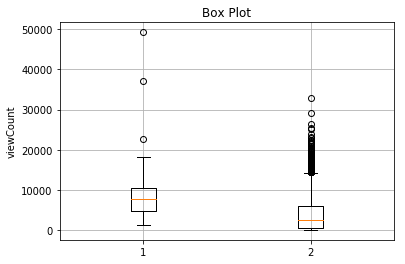

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.boxplot([treatment['viewCount'], placebo['viewCount']])
plt.xlabel('')
plt.ylabel('viewCount')
plt.title('Box Plot')
plt.grid()
plt.show()

## Results
실험군 조회수 평균은 9310회,  
대조군 조회수 평균은 3813회  
(p-value < 0.001)

## Conclusion
'진양곤' 제목은 조회수가 잘 나온다.   